In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn
import sklearn
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split as tts
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

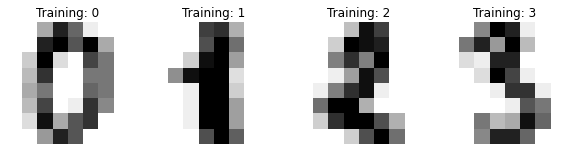

In [6]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [7]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [8]:
classNo = digits['target_names']
noOfClasses = len(digits['target_names'])

In [9]:
images = np.array(digits.images)
classNo = np.array(digits.target)

In [10]:
images.shape, classNo.shape

((1797, 8, 8), (1797,))

In [12]:
test_ratio = 0.1
val_ratio = 0.1
imageDimensions = (8,8,1)

In [13]:
x_train, x_test, y_train, y_test = tts(images, classNo, test_size = test_ratio)
x_train, x_val, y_train, y_val = tts(x_train, y_train, test_size = val_ratio)

In [14]:
print("Classes : ", classNo)
print("shape of raw image dataset : ",images.shape)
print("shape of train dataset : ",x_train.shape)
print("shape of test dataset : ",x_test.shape)
print("shape of validation dataset : ",x_val.shape)

Classes :  [0 1 2 ... 8 9 8]
shape of raw image dataset :  (1797, 8, 8)
shape of train dataset :  (1455, 8, 8)
shape of test dataset :  (180, 8, 8)
shape of validation dataset :  (162, 8, 8)


In [15]:
noOfSamples = []
for x in range(0, noOfClasses):
    print(f"no. of images having class = {x} is",len(np.where(y_train==x)[0]))
    noOfSamples.append(len(np.where(y_train==x)[0]))
print('\n',noOfSamples)

no. of images having class = 0 is 145
no. of images having class = 1 is 149
no. of images having class = 2 is 151
no. of images having class = 3 is 148
no. of images having class = 4 is 150
no. of images having class = 5 is 141
no. of images having class = 6 is 135
no. of images having class = 7 is 148
no. of images having class = 8 is 135
no. of images having class = 9 is 153

 [145, 149, 151, 148, 150, 141, 135, 148, 135, 153]


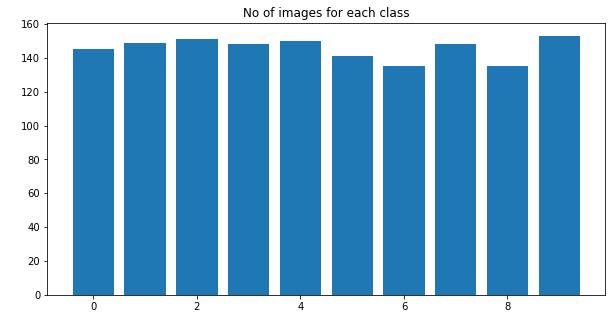

In [16]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses), noOfSamples)
plt.title("No of images for each class")
plt.xlabel("class ID", color='w')
plt.ylabel("No. of images", color='w')
plt.show()

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Scaler_standard = StandardScaler()
Scaler_minmax = MinMaxScaler()

def preProcessing(img):
#     img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     img = cv2.equalizeHist(img)
    scaled_img = img/12

#     scaled_img = Scaler_standard.fit_transform(img)
#     scaled_img = Scaler_minmax.fit_transform(img)
    
#     scaled_img_1 = Scaler_standard.fit_transform(img)
#     scaled_img = Scaler_minmax.fit_transform(scaled_img_1)
    return scaled_img

def preProcessing_S(img):
    scaled_img = Scaler_standard.fit_transform(img)
    return scaled_img

def preProcessing_N(img):
    scaled_img = Scaler_minmax.fit_transform(img)
    return scaled_img

def preProcessing_N_S(img):    
    scaled_img_1 = Scaler_minmax.fit_transform(img)
    scaled_img = Scaler_standard.fit_transform(scaled_img_1)
    return scaled_img

def preProcessing_S_N(img):    
    scaled_img_1 = Scaler_standard.fit_transform(img)
    scaled_img = Scaler_minmax.fit_transform(scaled_img_1)
    return scaled_img

In [62]:
img0 = preProcessing(x_train[70])
img1 = preProcessing_N(x_train[70])
img2 = preProcessing_S(x_train[70])
img3 = preProcessing_N_S(x_train[70])
img4 = preProcessing_S_N(x_train[70])

img0 = cv2.resize(img0,(300,300))
img1 = cv2.resize(img1,(300,300))
img2 = cv2.resize(img2,(300,300))
img3 = cv2.resize(img3,(300,300))
img4 = cv2.resize(img4,(300,300))

cv2.imshow("PreProcessed Image", img0)
cv2.imshow("PreProcessed Image (N)", img1)
cv2.imshow("PreProcessed Image (S)", img2)
cv2.imshow("PreProcessed Image (N_S)", img3)
cv2.imshow("PreProcessed Image (S_N)", img4)

cv2.waitKey(0)

-1

In [63]:
x_train = np.array(list(map(preProcessing_S_N,x_train)))
x_test = np.array(list(map(preProcessing_S_N,x_test)))
x_val = np.array(list(map(preProcessing_S_N,x_val)))

In [64]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [65]:
x_train.shape

(1455, 8, 8, 1)

In [66]:
dataGen = IDG(
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.2,
            shear_range=0.1,
            rotation_range=10
)

In [67]:
dataGen.fit(x_train)

In [68]:
y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_val = to_categorical(y_val,noOfClasses)

In [69]:
# LENET Model
def myModel():
    noOfFilters = 60
    sizeOfFilter1 = (5,5)
    sizeOfFilter2 = (3,3)
    sizeOfPool = (2,2)
    noOfNode = 500
    
    model = Sequential()
    model.add((Conv2D(noOfFilters,sizeOfFilter1, input_shape=(imageDimensions[0],imageDimensions[1],imageDimensions[2]), activation='relu')))
    model.add((Conv2D(noOfFilters,sizeOfFilter1, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation='relu')))
    model.add((Conv2D(noOfFilters//2,sizeOfFilter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noOfNode,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [70]:
model = myModel()
print(model.summary())

ValueError: Exception encountered when calling layer "conv2d_1" (type Conv2D).

Negative dimension size caused by subtracting 5 from 4 for '{{node conv2d_1/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_1/Conv2D/ReadVariableOp)' with input shapes: [?,4,4,60], [5,5,60,60].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 4, 4, 60), dtype=float32)

In [32]:
batchSizeVal = 50
epochsVal = 10
stepsPerEpochVal = 200

In [33]:
history = model.fit(dataGen.flow(x_train,y_train,
                               batch_size=batchSizeVal),
                               steps_per_epoch=stepsPerEpochVal,
                               epochs=epochsVal,
                               validation_data=(x_val,y_val),
                               shuffle=1)

Epoch 1/10


InvalidArgumentError:  Computed output size would be negative: -2 [input_size: 0, effective_filter_size: 3, stride: 1]
	 [[node sequential_3/conv2d_12/Relu (defined at <ipython-input-33-dd730996f8e7>:1) ]] [Op:__inference_train_function_2747]

Function call stack:
train_function


In [37]:
tf.__version__

'2.6.0'